Numpy - One-dimensional linear interpolation (numpy.interp)

https://numpy.org/doc/stable/reference/generated/numpy.interp.html

numpy.interp(x, xp, fp, left=None, right=None, period=None)

The x-coordinate sequence is expected to be increasing, but this is not explicitly enforced. However, if the sequence xp is non-increasing, interpolation results are meaningless.

Note that, since NaN is unsortable, xp also cannot contain NaNs.

A simple check for xp being strictly increasing is: np.all(np.diff(xp) > 0)

In [1]:
import numpy as np
xp = [1, 2, 3]
fp = [3, 2, 0]
np.interp(2.5, xp, fp)

1.0

In [2]:
np.interp([0, 1, 1.5, 2.72, 3.14], xp, fp)

array([3.  , 3.  , 2.5 , 0.56, 0.  ])

Extrapolates firts or last value unless left and right defined  

In [3]:
np.interp(0, xp, fp)

3.0

In [4]:
np.interp(3.14, xp, fp)

0.0

In [5]:
RUNDEF = 99.0
np.interp(3.14, xp, fp, right=RUNDEF)

99.0

In [6]:
LUNDEF = -99.0
np.interp(3.14, xp, fp, left=LUNDEF)

0.0

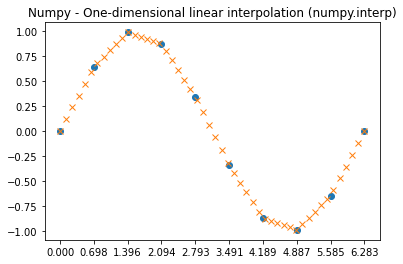

In [7]:
x = np.linspace(0, 2*np.pi, 10)
y = np.sin(x)
xvals = np.linspace(0, 2*np.pi, 50)
yinterp = np.interp(xvals, x, y)

import matplotlib.pyplot as plt
plt.plot(x, y, 'o')
plt.plot(xvals, yinterp, 'x')
plt.title("Numpy - One-dimensional linear interpolation (numpy.interp)")
plt.xticks(x)
plt.savefig("np_interp.png")
plt.show()

In [8]:
x = np.linspace(0, 2*np.pi, 10)
y = np.sin(x)
xvals = np.linspace(-np.pi, 3*np.pi, 75)
xticks = np.linspace(-np.pi, 3*np.pi, 15)
yinterp = np.interp(xvals, x, y,period=2*np.pi)

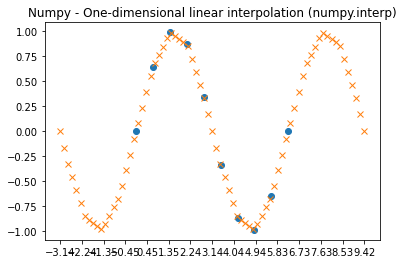

In [9]:
import matplotlib.pyplot as plt
plt.plot(x, y, 'o')
plt.plot(xvals, yinterp, 'x')
plt.title("Numpy - One-dimensional linear interpolation (numpy.interp)")
plt.xticks(xticks)
plt.savefig("np_interp.png")
plt.show()

Considering that
$$ y = y_0 + (x-x_0) \frac{y_1-y_0}{x_1-x_0} $$
then
$$ y = y_0  \left( 1- \frac{x-x_0}{x_1-x_0}  \right) + y_1 \frac{x-x_0}{x_1-x_0} $$
and considering that  normalized distances add to 1
$$  \frac{x-x_0}{x_1-x_0} +\frac{x_1-x}{x_1-x_0} = 1 $$
then
$$  \frac{x_1-x}{x_1-x_0} = 1 - \frac{x-x_0}{x_1-x_0} $$
therefore 
$$ y = y_0  \left(\frac{x_1-x}{x_1-x_0}\right)  + y_1\left(\frac{x-x_0}{x_1-x_0} \right)$$
or 
$$ y = \frac{y_0(x_1-x) + y_1 (x-x_0)}{x_1-x_0}$$